# Project: Investigate a Movie Dataset

### Author/Analyst: Leon Hamnett  ([linkedin](https://www.linkedin.com/in/leon-hamnett-47a426a0/))


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project, we will be performing exploratory analysis on the TMDB movie dataset: https://www.kaggle.com/tmdb/tmdb-movie-metadata. This data set contains information about 10,000 movies collected from
The Movie Database (TMDb), including user ratings and revenue. The columns included in this dataset are as follows:

'id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title','cast', 'homepage', 'director', 'tagline', 'keywords', 'overview','runtime', 'genres', 'production_companies', 'release_date','vote_count', 'vote_average', 'release_year', 'budget_adj','revenue_adj'

After reviewing the data the following exploratory research questions were proposed about the dataset:
#### 1. Is a higher budget correlated with a higher revenue/higher profit?
#### 2. Are action or romance movies rated better?

In [50]:
#importing libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [51]:
#loading data from csv file
df = pd.read_csv('tmdb-movies.csv')
#initial assessment of dataset
df.head()
df.tail()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Cleaning:

### Checking for Duplicate Rows:

First we will  check the dataset for duplicate rows:

In [52]:
sum(df.duplicated())

1

We see there is one duplicate row, we check this row just as a precaution and then drop it from the dataset. We also confirm the duplicate row has been removed:

In [53]:
df.loc[df.duplicated()]
df =  df.drop_duplicates()
sum(df.duplicated())

0

### Checking column names:
We see that the columns names are all already in lowercase and with underscores instead of spaces and so no changes are needed for optimal python handling of column names. We also see that the existing column names give a good description of what data is in each column and so no further changes are needed for clarity and understanding.

### Checking for null values and datatypes:
Now we will use the info() function to show the amount of non-null values as well as the datatype for each column:

In [54]:
#checking for null values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

We can see from the info() function that all datatypes are correct except for the release_date column which has a string format. It could be more efficient to change this column into a datetime format which will be addressed in a section below.

We also see that the following columns contain null values and thus have missing data:

* imdb_id 
* cast
* homepage
* director
* tagline
* keywords
* overview
* genres
* production_companies

The only variable here that could affect the proposed research questions is the genres column. For the other variables we will just ignore the missing values as it is likely we will not use these columns in the analysis anyway, and to drop all rows with missing data would remove too much of the dataset. 

We check to see how many rows in the genres column are affected by null values or blank values:


In [55]:
print(sum(df['genres'].isnull()))
sum(df['genres']=='')

23


0

We check for null values and rows that are blank and maybe have not been labelled as null by mistake. Ww see that there are only 23 rows with null values in the genres column and no values with blank strings. We have a quick look through the results in the genres columns with the value counts function to see if there is any other unexpected data:

In [56]:
#checking genre column for unexpected data
df['genres'].value_counts()
df['genres'].value_counts().sort_index()
df['genres'].value_counts().sort_index(ascending=False)

From looking at the value counts, and then checking the value counts in ascending and descending order, we can make sure there are no more unexpected types of data in this column. It is also worth noting that a genre, can have multiple genres seperated by a "|" character and so any analysis looking at the genres column will take this into account.

We will quickly check the rows with null values in the genres column and then we will drop them from the dataset, and confirm these rows have been dropped:

In [57]:
#check rows with null values in genres field
df.loc[df['genres'].isnull()];

In [58]:
#remove rows
drop_rows =df.loc[df['genres'].isnull()]
df_edited = df.drop(axis=0,index=drop_rows.index)
#check to make sure rows have been removed
df_edited.shape

(10842, 21)

### Changing format of datetime:
As noted before, the release_date column is currently set as a string. In the following cells we will change the release_date column to datetime format for easier (and more computationally efficient) analysis. First we split the release date string on the character "/" to get separate values for month,day and year:

In [59]:
#slice release_date string into month,day,year
date = df_edited['release_date']
date_s = date.str.split('/')
#create a new dataframe for sliced strings
MDY =pd.DataFrame(columns=['month','day','year'])
MDY['month'] = date_s.apply(lambda x: x[0])
MDY['day'] = date_s.apply(lambda x: x[1])
MDY['year'] = date_s.apply(lambda x: x[2])
MDY.head()

,month,day,year
0,6,9,15
1,5,13,15
2,3,18,15
3,12,15,15
4,4,1,15


We see that for the movie release date we only have the final two years numbers ('89') and not the full year (1989) and so we must fill in this missing information. It is not enough to use the datetime function as if given the final two year numbers, pandas will convert any year before 1969 into a 2000 year e.g '55' will be converted into 2055. We check to see the year values we have in the release_date column: 

In [60]:
#checking year values
MDY['year'].value_counts().sort_index()

00    226
01    241
02    266
03    281
04    307
05    363
06    408
07    438
08    495
09    531
10    487
11    540
12    584
13    656
14    699
15    627
60     32
61     31
62     32
63     34
64     42
65     35
66     46
67     40
68     39
69     31
70     40
71     55
72     40
73     55
74     46
75     44
76     47
77     57
78     65
79     57
80     78
81     82
82     81
83     80
84    105
85    109
86    121
87    125
88    145
89    136
90    132
91    133
92    133
93    178
94    184
95    174
96    203
97    192
98    210
99    224
Name: year, dtype: int64

We can see from the value_counts above that the earliest movies in our dataset are from 1960 and so any year number from 60 to 99 is from the 1900s and any year number from 00 to 15 is from the 2000s. Thus we update our year values to contain the full year:

In [61]:
# define a function to change the year to the correct full year
def u_year(x):
    if int(x) <= 15:
        return '20'+x
    if int(x) >= 60:
        return '19'+x
# create a new column for full year strings
MDY['year_updated']=MDY['year'].apply(lambda x:u_year(x))
#check to make sure year_updated column has been populated correctly
MDY['year_updated'].value_counts()

2014    699
2013    656
2015    627
2012    584
2011    540
2009    531
2008    495
2010    487
2007    438
2006    408
2005    363
2004    307
2003    281
2002    266
2001    241
2000    226
1999    224
1998    210
1996    203
1997    192
1994    184
1993    178
1995    174
1988    145
1989    136
1991    133
1992    133
1990    132
1987    125
1986    121
1985    109
1984    105
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     57
1971     55
1973     55
1976     47
1974     46
1966     46
1975     44
1964     42
1972     40
1967     40
1970     40
1968     39
1965     35
1963     34
1960     32
1962     32
1961     31
1969     31
Name: year_updated, dtype: int64

Now we can convert these values to datetime and replace the original string values with the new datetime values:

In [62]:
#recombine strings into correct datetime format
MDY['datetime'] = MDY['month']+'/'+MDY['day']+'/'+MDY['year_updated']
# update the release_date column with correct data in the datetime format
df_edited['release_date'] = pd.to_datetime(MDY['datetime'],format='%m/%d/%Y')
#check to make sure datatype has been changed to datetime
df_edited.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
id                      10842 non-null int64
imdb_id                 10834 non-null object
popularity              10842 non-null float64
budget                  10842 non-null int64
revenue                 10842 non-null int64
original_title          10842 non-null object
cast                    10767 non-null object
homepage                2931 non-null object
director                10800 non-null object
tagline                 8036 non-null object
keywords                9367 non-null object
overview                10839 non-null object
runtime                 10842 non-null int64
genres                  10842 non-null object
production_companies    9826 non-null object
release_date            10842 non-null datetime64[ns]
vote_count              10842 non-null int64
vote_average            10842 non-null float64
release_year            10842 non-null int64
budget_adj       

Finally we drop the uneeded columns to obtain a cleaned dataset:

In [63]:
drop_cols = ['imdb_id','cast','homepage','director','tagline','keywords','overview','production_companies']
df_clean = df_edited.drop(columns=drop_cols)
df_clean.head();

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Is a higher movie budget correlated with higher revenue/higher average vote?

First we create a new dataframe with the variables of interest. It was decided to use the values for budget_adj and revenue_adj instead of budget and revenue. As the dataset spans a large number of years, it was felt this method more accurately takes into account the difference in values of money across the time period as the _adj variables take into account differences in budget and revenue due to inflation. 

We then check the distributions of the variables of interest:

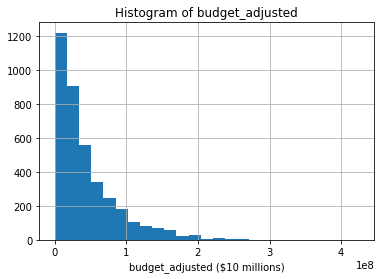

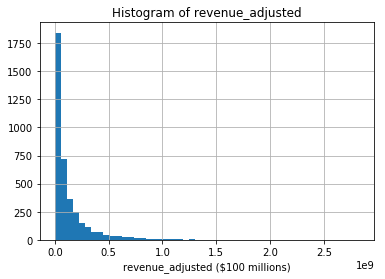

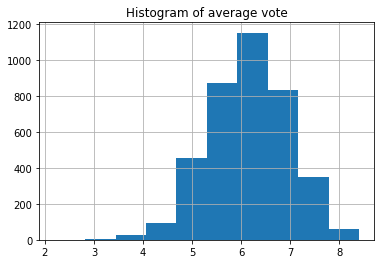

In [64]:
#create new dataframe with variables of interest
df1 = df_clean.loc[:,['budget_adj','revenue_adj','vote_average']]
#remove rows with no adjusted budget or adjusted revenue
rows_to_drop = df1.loc[(df1['budget_adj']==0)|(df1['revenue_adj']==0)]
df1_clean = df1.drop(index=rows_to_drop.index)
#check distributions
data = df1_clean['budget_adj']
plt.hist(df1_clean['budget_adj'], bins=25);
plt.title('Histogram of budget_adjusted')
plt.xlabel('budget_adjusted ($10 millions)')
plt.grid(b=True)
plt.show()
df1_clean['revenue_adj'].hist(bins=50)
plt.xlabel('revenue_adjusted ($100 millions)')
plt.title('Histogram of revenue_adjusted')
plt.show()
df1_clean['vote_average'].hist()
plt.title('Histogram of average vote')
plt.show()

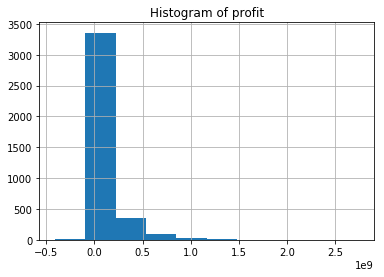

In [65]:
df1_clean['profit']= df1_clean['revenue_adj']-df1_clean['budget_adj']
df1_clean['profit'].hist()
plt.title('Histogram of profit')
plt.show()

Now we create and examine scatter plots of budget adjusted against revenue adjusted, profit and vote_average. We also look at line of best fits for each pair of variables to better understand the correlation.

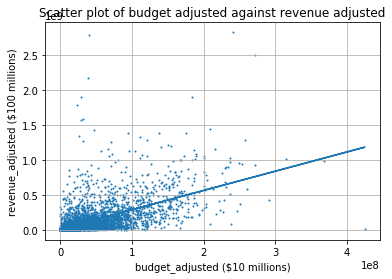

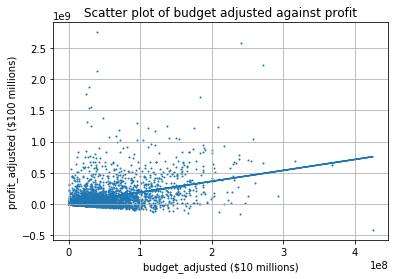

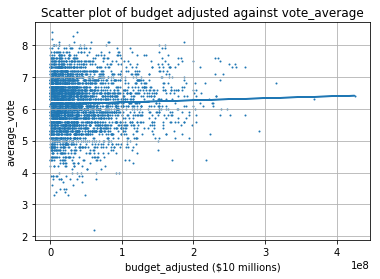

In [66]:
#scatter plot 1 - budget vs revenue
x = df1_clean['budget_adj']
y = df1_clean['revenue_adj']
plt.scatter(x,y,s=1)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.xlabel('budget_adjusted ($10 millions)')
plt.ylabel('revenue_adjusted ($100 millions)')
plt.title('Scatter plot of budget adjusted against revenue adjusted')
plt.grid(b=True)
plt.show()

#scatter plot 2 - budget vs profit
x = df1_clean['budget_adj']
y = df1_clean['profit']
plt.scatter(x,y,s=1)
plt.xlabel('budget_adjusted ($10 millions)')
plt.ylabel('profit_adjusted ($100 millions)')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.title('Scatter plot of budget adjusted against profit')
plt.grid(b=True)
plt.show()

# scatter plot 3 - budget vs vote_count
x = df1_clean['budget_adj']
y = df1_clean['vote_average']
plt.scatter(x,y,s=1)
plt.xlabel('budget_adjusted ($10 millions)')
plt.ylabel('average_vote')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.title('Scatter plot of budget adjusted against vote_average')
plt.grid(b=True)
plt.show()

## Research Question 1 Findings:
We see that there is a distinct positive correlation between the budget of a movie and the revenue generated, as well as a positive correlation between the budget of a movie and the profit generated. 

We also see that there is slight positive correlation between the budget of a movie and it's average vote received, but this relationship does not look to be very significant. 

### Research Question 2: Do action or romance movies score better/generate more revenue/are more popular?

For this research question we want to determine if, in general, action or romance movies score better. We also want to check to see which type of movie generates more revenue and is more popular. 

We will seperate the dataset into action and romance movies and discard any unneccessary rows, then compare the two groups on metrics such as revenue and average vote score.

First we will separate out the genres column, creating new dataframes with new rows for each action and romance movie:

In [67]:
#create new dataframes for action and romance movies
# new data set with rows with multiple genres
#select required columns
df2 = df_clean.loc[:,['id','popularity','genres','vote_average','revenue','revenue_adj']]

#select rows with action or romance in genres column
df2_edited = df2.loc[df2['genres'].str.contains('Action')|df2['genres'].str.contains('Romance')]

#separate rows that have genres needed to be split and rows that don't
to_split = df2_edited.loc[df2_edited['genres'].str.contains('|')]
not_to_split = df2_edited.loc[(df2_edited['genres']=='Action')|(df2_edited['genres']=='Romance')]

#it appears rows with only action or romance have appeared in the 'to_split' dataframe as well
#this would give errors when splitting so we remove these rows
to_split = to_split.drop(axis=0,index=not_to_split.index)

#check rows have been separated correctly 
df2_edited.shape[0] == to_split.shape[0] + not_to_split.shape[0] 

#split genres to create a new column with a list of individual genres
after_split = to_split.copy()
after_split['s_genres'] = to_split['genres'].str.split(pat='|')

#function to check if a movie is an action or romance movie
def check_action(a):
    if 'Action' in a and 'Romance' not in a:
        return 'Action'
    elif 'Romance' in a and 'Action' not in a:
        return 'Romance'
    elif 'Action' in a and 'Romance' in a:
        return 'Both'
    else:
        return 'Neither'

#create a new column with specific genre
after_split['genre_spec']=after_split['s_genres'].apply(lambda x: check_action(x))

#create dateframes of action and romance movies to add to the movies which did not need splitting
action_to_append = after_split.loc[(after_split['genre_spec']=='Action')|(after_split['genre_spec']=='Both')]
romance_to_append = after_split.loc[(after_split['genre_spec']=='Romance')|(after_split['genre_spec']=='Both')]

#create a new dataframe for action movies
df2_action = not_to_split.loc[not_to_split['genres']=='Action']
df2_action = df2_action.append(action_to_append)
#create a new column to label all movies in this set as action
df2_action['genre'] = 'Action'
#remove uneededed columns
df2_action.drop(columns=['genre_spec','genres','s_genres'],inplace=True)

#create a new dataframe for romance movies
df2_romance = not_to_split.loc[not_to_split['genres']=='Romance']
df2_romance = df2_romance.append(romance_to_append)
#create a new column to label all movies in this set as romance
df2_romance['genre'] = 'Romance'
#drop uneeded columns
df2_romance.drop(columns=['genre_spec','genres','s_genres'],inplace=True)


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


Now we have the two seperate datasets for each type of movie, we can check the proportions of each movie type  present in the database:

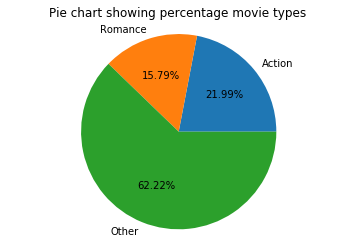

In [68]:
#obtain counts for total rows and for action and romance movie types
total_rows = df2.shape[0]
action_rows = df2_action.shape[0]
romance_rows = df2_romance.shape[0]
other_rows = total_rows - action_rows - romance_rows
labels = ['Action', 'Romance', 'Other']
sizes = [action_rows, romance_rows, other_rows]
plt.pie(sizes,labels = labels,autopct='%1.2f%%')
plt.axis('equal')
plt.title('Pie chart showing percentage movie types')
plt.show()

We can see from the above pie chart that from our intial dataset, around 22% have been labelled as action films, around 16% have been labelled as romance films and 62% are labelled with neither action or romance genres. We can now begin to answer our research question: 

First we will check to see the average movie score for each genre:

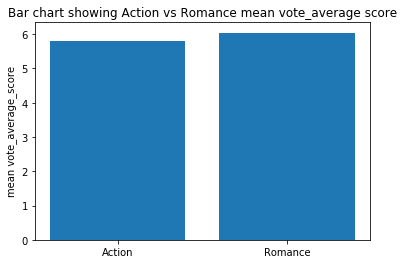

In [69]:
#selecting means
mean_act_score = df2_action['vote_average'].mean()
mean_rom_score = df2_romance['vote_average'].mean()
#creating bar chart
labels = ['Action','Romance']
plt.bar([1,2],[mean_act_score,mean_rom_score],tick_label=labels)
plt.ylabel('mean vote_average_score')
plt.title('Bar chart showing Action vs Romance mean vote_average score')
plt.show()

 

We can see that Romance movies score slightly higher on average when compared to Action movies. We can also check the boxplots to see more information:

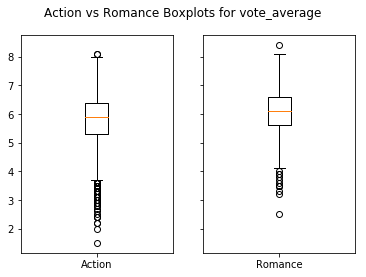

In [70]:
#creating boxplots
fig, (ax1, ax2) = plt.subplots(1, 2,sharey=True)
fig.suptitle('Action vs Romance Boxplots for vote_average')
ax1.boxplot(df2_action['vote_average'])
ax1.set_xticklabels(['Action'])
ax2.boxplot(df2_romance['vote_average'])
ax2.set_xticklabels(['Romance']);

From the above boxplots, we can see that action movies has a considerably higher amount of low outlier values than romance movies. Otherwise the means and interquartiles are very similar. Next we create a bar chart to compare the other variables (popularity,revenue adjusted) and compare them against the avergae voter score.

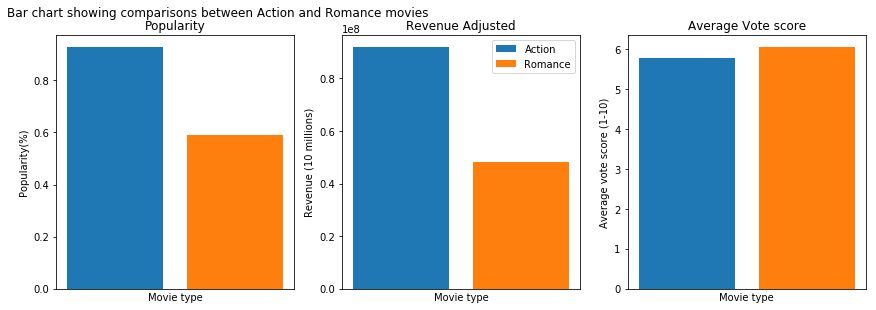

In [71]:
#collect data
action = [df2_action['popularity'].mean(),df2_action['revenue_adj'].mean(),mean_act_score]
romance = [df2_romance['popularity'].mean(),df2_romance['revenue_adj'].mean(),mean_rom_score]
#set up sub plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
#popularity subplot
ax1.bar(1,action[0])
ax1.bar(2,romance[0])
ax1.title.set_text('Popularity')
ax1.set_xlabel('Movie type')
ax1.set_ylabel('Popularity(%)')
ax1.set_xticks([]) 
#revenue adjusted subplot
ax2.bar(1,action[1])
ax2.bar(2,romance[1])
ax2.title.set_text('Revenue Adjusted')
ax2.set_xlabel('Movie type')
ax2.set_ylabel('Revenue (10 millions)')
ax2.set_xticks([]) 
#average_vote_score subplot
ax3.bar(1,action[2])
ax3.bar(2,romance[2])
ax3.title.set_text('Average Vote score')
ax3.set_xticks([]) 
ax3.set_xlabel('Movie type')
ax3.set_ylabel('Average vote score (1-10)')
#finetuneing
fig.suptitle('Bar chart showing comparisons between Action and Romance movies',ha='center')
plt.subplots_adjust(left=None, bottom=0, right=2, top=None, wspace=None, hspace=None)
ax2.legend(['Action','Romance']);

#### Research Question 2 Findings:

We see from the bar charts above, that even though Romance movies score better in the average score given by  movie watchers, we see that action movies are generally much more popular and in general, collect more revenue. 

<a id='conclusions'></a>
## Conclusions

#### Research Question 1:
We can see that there is a positive correlation between the budget a movie has and the revenue/profit that it generates. It appears there was a minimum correlation between the average_vote and the budget of a movie and from this we can assume that the amount of money that is spent on a movie is not a reliable indicator of whether people will give it a high score. 

It is worth noting that for this analysis 6988 rows were dropped as they had zero values for the budget_adjusted and revenue_adjusted columns. If a more accurate analysis were required, these numbers could be calculated or scraped from an additional data source.

#### Research Question 2:
We can see that from the movies in our dataset, romance movies have in general a higher average_score but action movies in general have a higher adjusted revenue and popularity. Further statistical tests could be carried out to determine the significance of the results we found, to determine the chance that these results did not occur by random chance.

For this analysis, we took any movie with a genre of action to be an action movie and any movie with a genre of romance to be a romance movie. It is possible that the genres column is constructed in such a way as the first genre listed is the "Primary Genre" and the rest are "Secondary". Perhaps the analysis could be made more accurate by only selecting movies which have a genre of action or romance in the first slot in the genres column.